# SEABORN EXCERCISE

In [106]:
import seaborn as sns 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 


In [195]:
df = sns.load_dataset('mpg').dropna()
df.head() 

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


# MPG

mpg adalah mile per gallon, atau seberapa jauh (dlm miles) jarak tempuh mobil dgn konsumsi bahan bakar 1 gallon (4.55 litre)  

In [136]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model_year    392 non-null    int64  
 7   origin        392 non-null    object 
 8   name          392 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 30.6+ KB


In [109]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


In [110]:
df['mpg'].mode()

0    13.0
dtype: float64

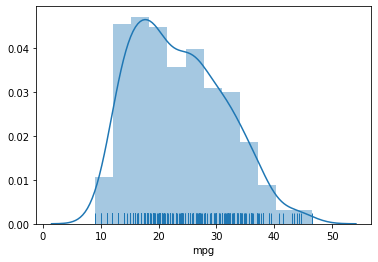

In [111]:
# distplot
sns.distplot(df['mpg'], rug=True)

# distribusi tidak normal
# skewness positive

In [112]:
df.loc[df['mpg']==13].count()['mpg']

20

# COMPARISON

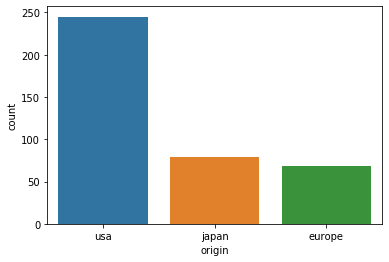

In [113]:
# countplot
sns.countplot(x=df['origin'], data=df)

# mobil berasal dari USA paling banyak

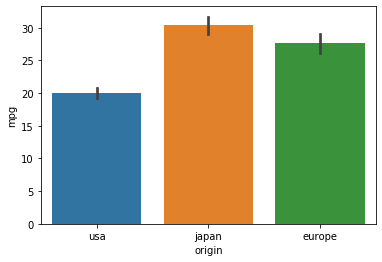

In [114]:
# barplot
sns.barplot(x='origin', y='mpg', data=df, estimator=np.mean)

# rata-rata mpg berdasarkan origin mobil, paling hemat adalah mobil dari japan, paling boros dari USA

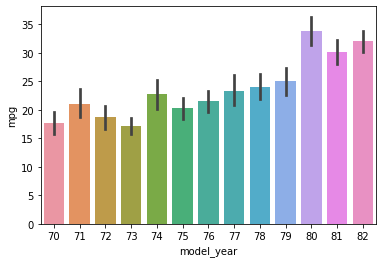

In [115]:
# barplot
sns.barplot(x='model_year', y='mpg', data=df, estimator=np.mean)

# rata-rata mpg berdasarkan tahun model mobil, paling hemat adalah mobil buatan model tahun 80, paling boros model tahun 73
# semakin tahun cenderung semakin irit bahan bakar

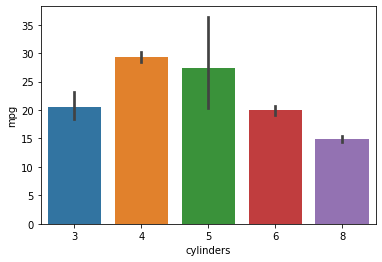

In [116]:
# barplot
sns.barplot(x='cylinders', y='mpg', data=df, estimator=np.mean)

# rata-rata mpg berdasarkan cylinder mobil, paling hemat adalah mobil dgn mesin 4 cylinders, paling boros 8 cylinder

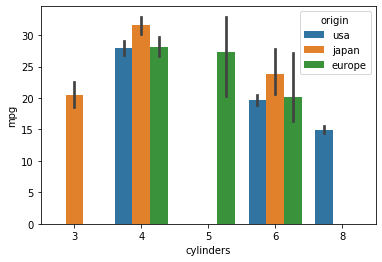

In [117]:
# barplot
sns.barplot(x='cylinders', y='mpg', data=df, hue='origin',estimator=np.mean)

# rata-rata mpg berdasarkan cylinder mobil dan origin mobil, paling hemat adalah mobil dgn mesin 4 cylinders
# mobil bermesin 3 cylinder hanya ada di japan
# mobil bermesin 5 cylinder hanya ada di europe
# mobil bermesin 8 cylinder hanya ada di USA

# RELATIONSHIP

In [118]:
df.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316
model_year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000


In [119]:
mask = np.zeros_like(df.corr())
mask[np.triu_indices_from(mask)]=True
mask

array([[1., 1., 1., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1., 1.],
       [0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 0., 0., 1.]])

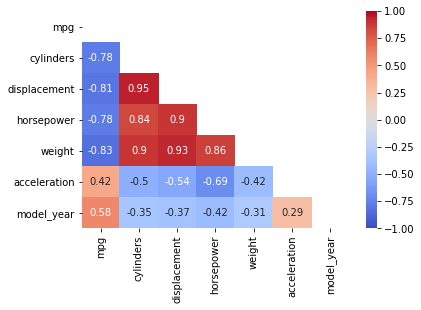

In [120]:
# heat map

sns.heatmap(df.corr(), mask=mask, vmin=-1, vmax=1, cmap='coolwarm', annot=True)


## Yang memiliki correlation besar ada pada:

- displacement vs cylinders
- horsepower vs cylinders
- weight vs cylinders
- horsepower vs displacement
- weight vs displacement
- horsepower vs weight

ini artinya, keempat feature ini saling berhubungan positif

## Yang memiliki correlation kecil ada pada:
- cylinders vs mpg
- displacement vs mpg
- horsepower vs mpg
- weight vs mpg

ini artinya, keempat feature ini berhubungan negatif dengan mpg, 
dgn kata lain semakin besar nilai keempat feature ini, maka semakin kecil nilai mpg (mobil semakin boros)

akan kita buktikan dgn jointplot regression di bawah ini


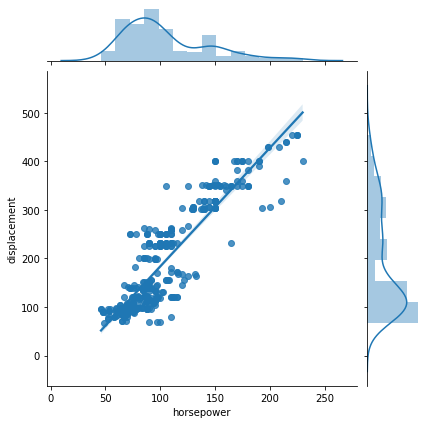

In [121]:
# jointplot

sns.jointplot(x='horsepower', y='displacement', data=df, kind='reg') 

# membuktikan semakin besar horsepower, maka cenderung semakin besar juga displacement-nya

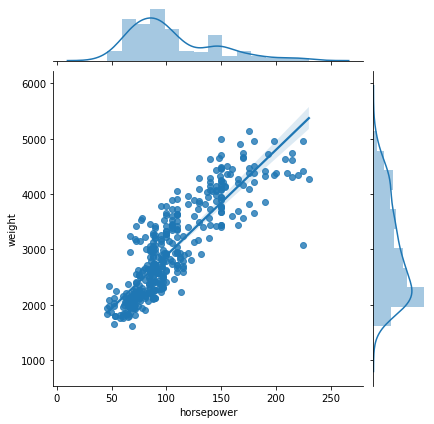

In [122]:
# jointplot

sns.jointplot(x='horsepower', y='weight', data=df, kind='reg') 

# membuktikan semakin besar horsepower, maka cenderung semakin besar juga weight-nya

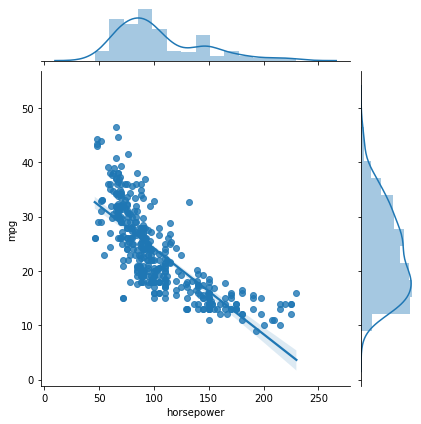

In [123]:
# jointplot

sns.jointplot(x='horsepower', y='mpg', data=df, kind='reg') 

# semakin besar horsepower, cenderung semakin kecil mpg-nya (semakin boros mobil)

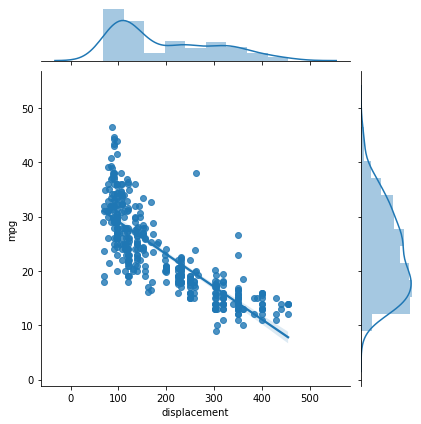

In [124]:
# jointplot

sns.jointplot(x='displacement', y='mpg', data=df, kind='reg') 

# semakin besar displacement, cenderung semakin kecil mpg-nya (semakin boros mobil)

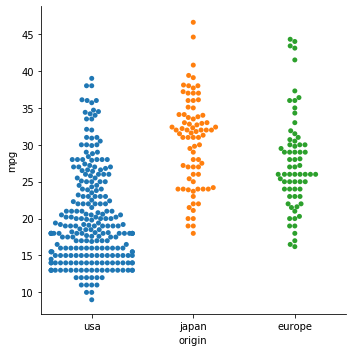

In [125]:
# categorical plot 
sns.catplot(x='origin', y='mpg', data=df, kind='swarm')

# melihat persebaran data dengan swarm plot
# modus data pada mpg bernilai 13 dgn 20 data
# mobil boros dgn nilai mpg kecil (<15) hanya ada pada mobil asal USA

In [126]:
df['mpg'].mode() # modus nilai mpg adalah 13

0    13.0
dtype: float64

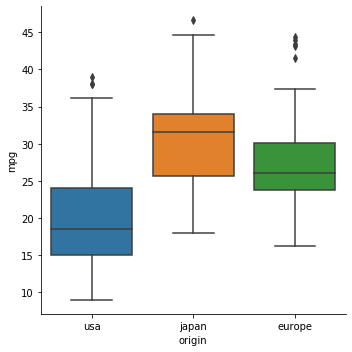

In [127]:
# boxplot

sns.catplot(x='origin', y='mpg', data=df, kind='box')

# dgn melihat boxplot, makin menjelaskan mobil paling hemat berasal dari japan, paling boros dari USA

# dgn melihat outliersnya:
# di USA, mpg > 36 sudah dianggap sangat irit
# di Japan, mpg > 44 baru dianggap sangat irit 

In [128]:
# Mobil paling irit adalah Mazda GLC
df.loc[df['mpg']==df['mpg'].max()]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
322,46.6,4,86.0,65.0,2110,17.9,80,japan,mazda glc


In [129]:
# Mobil Paling boros adalah HI 1200d
df.loc[df['mpg']==df['mpg'].min()]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
28,9.0,8,304.0,193.0,4732,18.5,70,usa,hi 1200d


In [207]:
df_mpg = df.loc[:,['mpg','model_year','origin']]
df_mpg.head()

,mpg,model_year,origin
0,18.0,70,usa
1,15.0,70,usa
2,18.0,70,usa
3,16.0,70,usa
4,17.0,70,usa


In [210]:
pv_mpg = df_mpg.pivot_table(values='mpg', index='origin', columns='model_year')
pv_mpg

model_year,70,71,72,73,74,75,76,77,78,79,80,81,82
origin,,,,,,,,,,,,,
europe,25.200000,28.750000,22.000000,24.000000,27.000000,24.50,24.250000,29.250000,24.950000,30.450000,36.8375,30.600000,40.000000
japan,25.500000,29.500000,24.200000,20.000000,29.333333,27.50,28.000000,27.416667,29.687500,32.950000,35.4000,32.958333,34.888889
usa,15.272727,17.736842,16.277778,15.034483,18.142857,17.55,19.431818,20.722222,21.772727,23.478261,26.3000,27.530769,29.789474


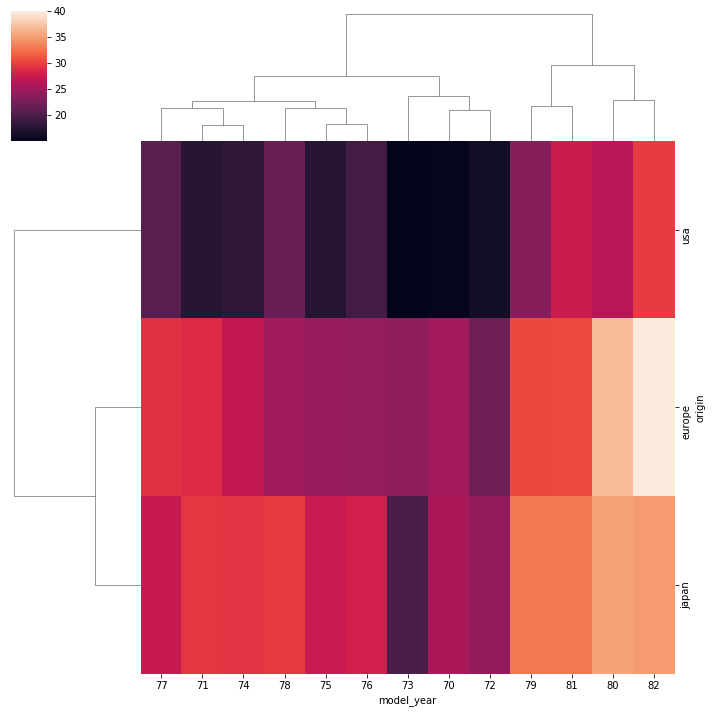

In [211]:
# cluster map
sns.clustermap(pv_mpg)

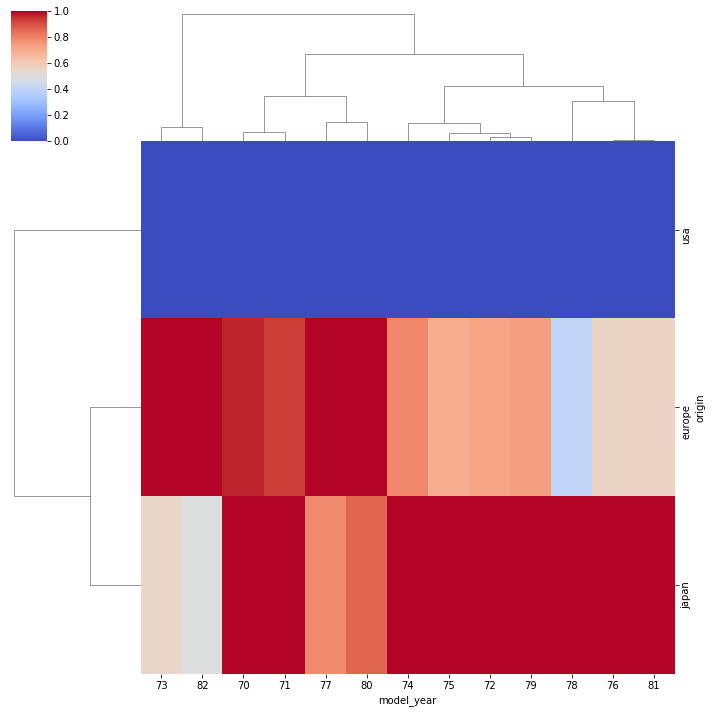

In [214]:
# cluster map dgn scaling
sns.clustermap(pv_mpg, standard_scale=1, cmap='coolwarm')

## Melihat clustering data: seberapa dekat/mirip antar-data

- data japan dan europe

## Brand

In [196]:
df = sns.load_dataset('mpg').dropna()
df.head() 

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [202]:
df_brand = df['name'].str.split(' ', n=1, expand=True)
df_brand.head()

,0,1
0,chevrolet,chevelle malibu
1,buick,skylark 320
2,plymouth,satellite
3,amc,rebel sst
4,ford,torino


In [198]:
df['brand'] = df_brand[0]
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,brand
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu,chevrolet
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320,buick
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite,plymouth
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst,amc
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino,ford


In [199]:
#  Ganti nama yg mirip
df['brand'].replace({
    'chevroelt':'chevrolet',
    'chevy':'chevrolet',
    'vokswagen':'vw',
    'volkswagen':'vw',
    'maxda':'mazda',
    'toyouta':'toyota',
    'mercedes':'mercedes-benz',
    },inplace=True)

In [200]:
df_brand_mpg = pd.DataFrame(df.groupby('brand').mean()['mpg'].sort_values(ascending=False))
df_brand_mpg = df_brand_mpg.reset_index()
df_brand_mpg

,brand,mpg
0,nissan,36.000000
1,triumph,35.000000
2,honda,33.761538
3,vw,31.840909
4,datsun,31.113043
5,subaru,30.525000
6,mazda,30.058333
7,renault,29.666667
8,fiat,28.912500
9,toyota,28.165385


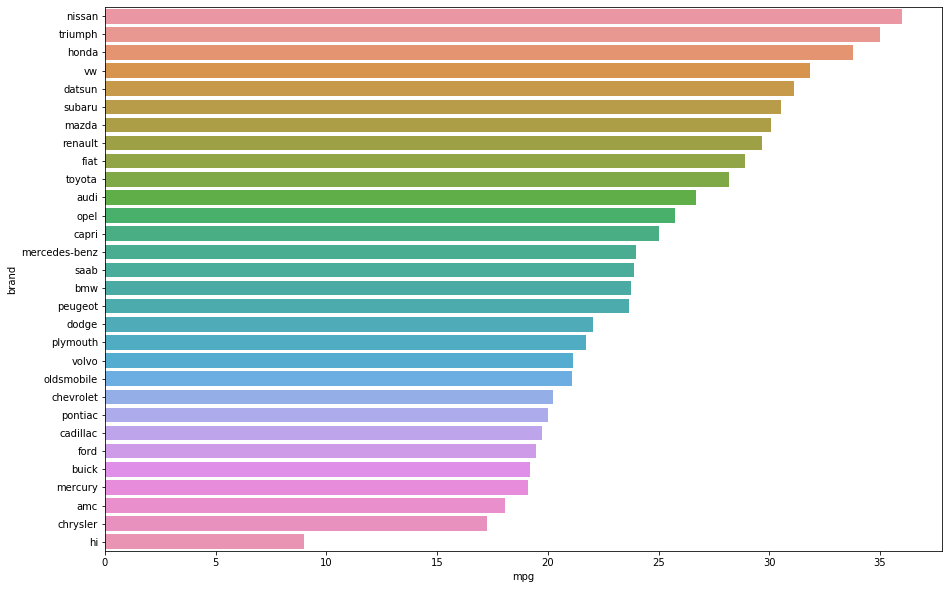

In [201]:
# barplot

plt.figure(figsize=(15,10))
sns.barplot(x='mpg', y='brand', data=df_brand_mpg)

# Brand mobil dengan rata-rata mpg paling besar (brand paling irit) adalah Nissan
# Brand paling boros adalah HI

Kirim PDF story tableau ke Brigita.gems@gmail.com
subject: Tableau exercise_nama
